# toolbox

<div class="alert alert-block alert-info">
<p>View interactive version on <a href="https://nbviewer.org/github/janjoch/toolbox/blob/main/demo/toolbox.ipynb">NBViewer</a>!</p>
</div>

## Imports

In [21]:
import toolbox as tb

In [2]:
import importlib
import math

import numpy as np

import pandas as pd

import plotly.express as px

In [ ]:
tb.iter.MUTE_STRICT_ZIP_WARNING = True

## Modules

### tb.arraytools

#### tb.arraytools.lowpass, tb.arraytools.highpass

In [20]:
n = 20000
x = np.arange(n)
y = np.random.normal(20,5,n) + np.linspace(0, 10, n)**2

n_samples = 1001

y_lp = tb.arraytools.lowpass(y, n=n_samples)
y_hp = tb.arraytools.highpass(y, n=n_samples)

fig = tb.plot.Plot(interactive=True,title="lowpass and highpass demo", xlabel="index", ylabel="value")
fig.add_line(x=x, y=y, label="raw")
fig.add_line(x=x + n_samples / 2, y=y_lp, label="lowpass")
fig.add_line(x=x + n_samples / 2, y=y_hp, label="highpass")
fig.post_process()

fig.show()

In [6]:
# works with np.array
tb.arraytools.lowpass(np.array(y), n=n_samples)

array([ 19.79505448,  19.78563085,  19.77783433, ..., 115.11466507,
       115.12122301, 115.13078437])

In [7]:
# works with pd.Series
tb.arraytools.lowpass(pd.Series(y), n=n_samples)

500       19.795054
501       19.785631
502       19.777834
503       19.772585
504       19.762019
            ...    
19495    115.093401
19496    115.106183
19497    115.114665
19498    115.121223
19499    115.130784
Length: 19000, dtype: float64

#### tb.arraytools.interp

In [9]:
x = np.arange(100,300,10)
x

array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290])

In [10]:
tb.arraytools.interp(x, 2.15)

121.5

#### tb.arraytools.Regression

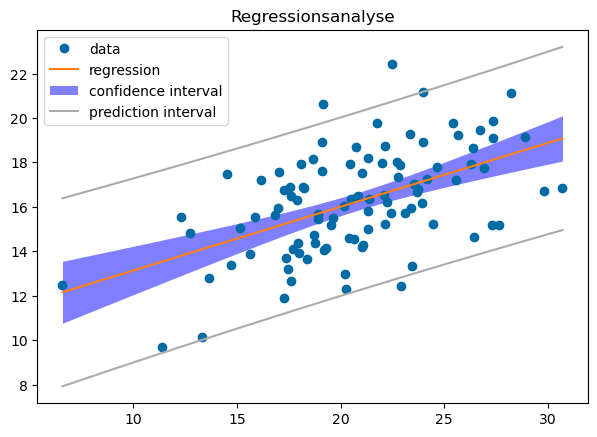

In [73]:
n = 100
a = 0.3
b = 10

x = np.random.normal(20, 5, n)
y = a * x + b + np.random.normal(0, 2, n)

for interactive in (True, False):
    tb.arraytools.LinearRegression(x, y).plot(
        interactive=interactive,
        title="Regressionsanalyse",
        color_ci="blue",
    ).show()


In [23]:
N = [
    [5, 10, ],
    [20, 50],
    [100, 1000],
]

fig = None

for i_row in range(3):
    for i_col in range(2):
        
        n = N[i_row][i_col]
        a = 0.3
        b = 10

        x = np.random.normal(20, 5, n)
        y = a * x + b + np.random.normal(0, 2, n)

        fig = tb.arraytools.LinearRegression(x, y).plot(
            interactive=True,
            fig=fig,
            skip_post_process=True,
            title="Regressionsanalyse",
            rows=3,
            cols=2,
            row=i_row,
            col=i_col,
            legend_loc=False,
            shared_xaxes="all",
            shared_yaxes="all",
            fig_size=(1000, 1000),
        )
fig.post_process()
fig.show()

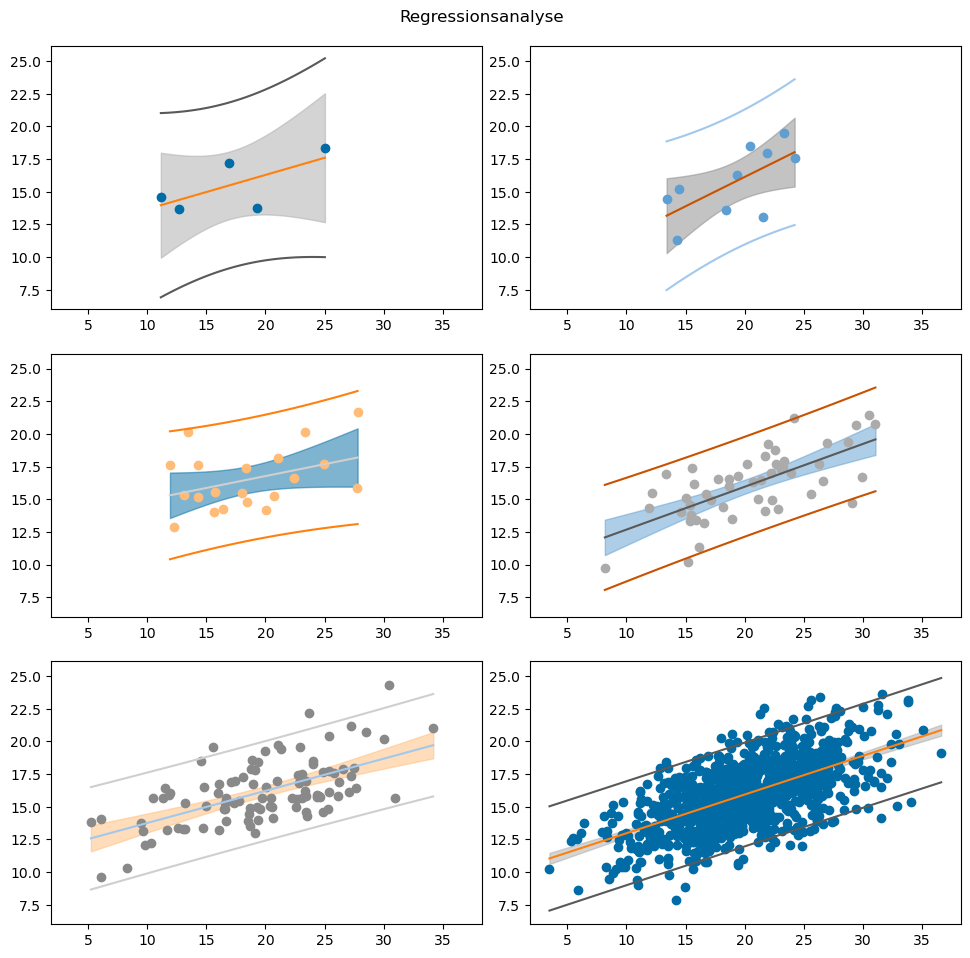

In [25]:
N = [
    [5, 10, ],
    [20, 50],
    [100, 1000],
]

fig = None

for i_row in range(3):
    for i_col in range(2):
        
        n = N[i_row][i_col]
        a = 0.3
        b = 10

        x = np.random.normal(20, 5, n)
        y = a * x + b + np.random.normal(0, 2, n)

        fig = tb.arraytools.LinearRegression(x, y).plot(
            interactive=False,
            fig=fig,
            skip_post_process=True,
            title="Regressionsanalyse",
            rows=3,
            cols=2,
            row=i_row,
            col=i_col,
            legend_loc=False,
            shared_xaxes="all",
            shared_yaxes="all",
            fig_size=(1000, 1000),
        )
fig.post_process()
fig.show()

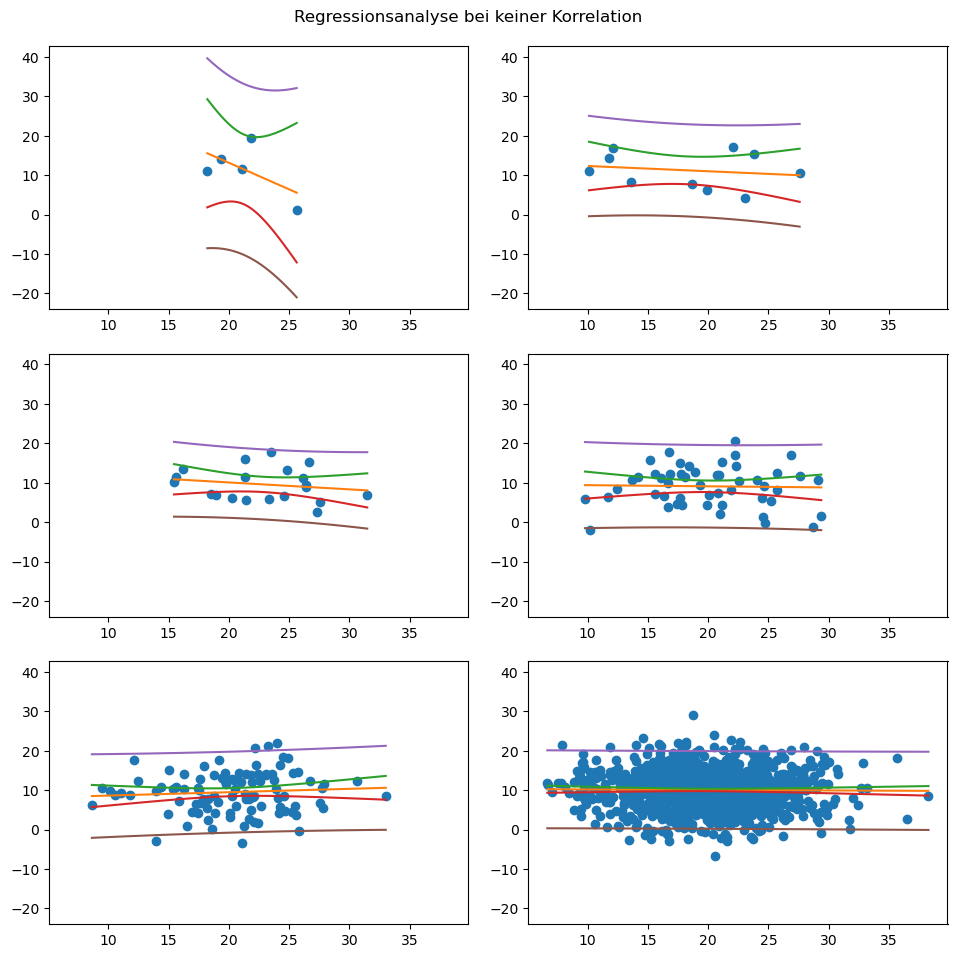

In [66]:
a = 0
b = 10

N = [
    [5, 10, ],
    [20, 50],
    [100, 1000],
]

fig = None

for i_row in range(3):
    for i_col in range(2):
        
        n = N[i_row][i_col]

        x = np.random.normal(20, 5, n)
        y = a * x + b + np.random.normal(0, 5, n)

        fig = tb.arraytools.LinearRegression(x, y).plot(
            interactive=False,
            fig=fig,
            skip_post_process=True,
            title="Regressionsanalyse bei keiner Korrelation",
            rows=3,
            cols=2,
            row=i_row,
            col=i_col,
            legend_loc=False,
            shared_xaxes="all",
            shared_yaxes="all",
            fig_size=(1000, 1000),
        )
fig.post_process()
fig.show()

### tb.convert

In [24]:
tb.convert.radpsec_to_rpm(20)

190.9859317102744

### tb.datetimeparser

In [11]:
import datetime as dt

import toolbox.datetimeparser as dtp

In [12]:
dt_str = str(dt.datetime.now())
dt_str

'2023-05-09 14:51:09.216042'

In [13]:
dtp.ymd(dt_str)

datetime.datetime(2023, 5, 9, 14, 51, 9, 216042)

In [14]:
dtp.dmy("31.12.2023")

datetime.datetime(2023, 12, 31, 0, 0)

In [15]:
# years below 100 are automatically considered as 20XX
dtp.dmy("1.2.23 18:40:59.123456")

datetime.datetime(2023, 2, 1, 18, 40, 59, 123456)

In [16]:
dtp.dmy("1.2.23 18:40:59.123", microsecond_shift=3)

datetime.datetime(2023, 2, 1, 18, 40, 59, 123000)

In [17]:
dtp.ymd("Recording started on 2023-12-31 11:30:59.123456 in Zurich")

datetime.datetime(2023, 12, 31, 11, 30, 59, 123456)

### tb.iter

#### zip_smart

In [18]:
from toolbox.iter import zip_smart

In [19]:
# Non-strict mode:
# (default behaviour of zip, but not zip_smart)
# zip stops as soon as the shortest iterator runs out of elements.

for a, b, c, d in zip_smart(
    ("A", "B", "C", "D"),
    [1, 2, 3, 4],
    True,
    np.arange(5),
    strict=False,
):
    print(a, b, c, d)

A 1 True 0
B 2 True 1
C 3 True 2
D 4 True 3


In [20]:
# Strict mode:
# (default behaviour of zip_smart, but not zip)
# zip throws an error if the iterators do not have the same length.
# Supported in Python >= 3.10

for a, b, c, d in zip_smart(
    ("A", "B", "C", "D"),
    [1, 2, 3, 4],
    True,
    np.arange(5),
):
    print(a, b, c, d)

A 1 True 0
B 2 True 1
C 3 True 2
D 4 True 3


D:\Code\toolbox\demo\..\toolbox\iter.py:57: UserWarning:

zip's strict mode not supported in Python<3.10.

Falling back to non-strict mode.



#### sum_nested

In [21]:
from toolbox.iter import sum_nested

In [22]:
sum_nested(
    (
        1,
        [1.4, 6, 8.7, ],
        {
            "arbitrary_key": 4,
            "numpy_array": np.array((1, 2, 3.5, )),
            "pandas_Series": pd.Series((1, 2, 3.5, )),
            "further_depth": (1,2,(1,2,(1,2))),
        },
    ),
)

43.1

In [23]:
# function fails if iteration depth is exceeded
sum_nested(
    (
        1,
        [1.4, 6, 8.7, ],
        {
            "arbitrary_key": 4,
            "numpy_array": np.array((1, 2, 3.5, )),
            "pandas_Series": pd.Series((1, 2, 3.5, )),
            "further_depth": (1,2,(1,2,(1,2))),
        },
    ),
    depth=3,
)

TypeError: Iterable type detected, but recursion has reached its maximum depth.

Element:
(1, 2, (1, 2))

Type:
<class 'tuple'>

In [ ]:
sum_nested((1,1,1,(2,2,2,(3,3,3))))

In [ ]:
inp = {1:10,2:12,3:14}

# standard digestion of dicts: just use the values
print(sum_nested(inp))

# custom digestion of dicts: use the keys
print(sum_nested(
    inp,
    custom_digestion=(
        (dict, (lambda dct: [key for key, _ in dct.items()])),
    ),
))

In [ ]:
inp = ("123", "456", "789")

# parse strings as floats
print(sum_nested(
    inp,
    custom_digestion=(
        (str, (lambda s: int(s))),
    ),
))

# make checksum of strings
# hand over a list of each digit,
# which will then be handled by sum_nested.
print(sum_nested(
    inp,
    custom_digestion=(
        (str, (lambda s: [int(l) for l in s])),
    ),
))

In [ ]:
# ignore None and np.nan values
print(sum_nested(
    (
        1,
        None,
        3,
        np.nan,
        5.,
    ),
    custom_digestion=(
        (type(None), (lambda _: 0)),
        (float, (lambda x: 0 if np.isnan(x) else x)),
    ),
))

# or set custom_digestion globally
tb.iter.CUSTOM_DIGESTION = (
    (dict, (lambda dct: [elem for _, elem in dct.items()])), # still
    (type(None), (lambda _: 0)),
    (float, (lambda x: 0 if np.isnan(x) else x)),
)
print(sum_nested(
    (
        1,
        None,
        3,
        np.nan,
        5.,
    )
))